# Explore BIC

In [6]:
# imports
from importlib import reload
from importlib.resources import files
import os
import numpy as np

from scipy.optimize import curve_fit

import pandas
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d

from ocpy.hydrolight import loisel23
from ocpy.utils import plotting as oc_plotting

from bing.models import anw as boring_anw
from bing.models import bbnw as boring_bbnw
from bing.models import utils as model_utils
from bing.models import functions
from bing import inference as big_inf
from bing import rt as big_rt
from bing import chisq_fit

import anly_utils

# Load

In [2]:
ds = loisel23.load_ds(4,0)

In [3]:
l23_wave = ds.Lambda.data
l23_Rrs = ds.Rrs.data
all_a = ds.a.data
all_bb = ds.bb.data
all_adg = ds.ag.data + ds.ad.data
all_ad = ds.ad.data
all_ag = ds.ag.data
all_aph = ds.aph.data
all_anw = ds.anw.data

## Chl

In [23]:
i440 = np.argmin(np.abs(l23_wave-440.))
Chl = all_aph[:,i440] / 0.05582
Chl = Chl.flatten()

## $a_{\rm CDOM}$

In [29]:
a_cdom = all_ag[:,i440]
fa_cdom = all_ag[:,i440] / all_anw[:,i440]

# BIC

In [5]:
s2ns = ['MODIS_Aqua']
MODIS = True
PACE = False
dataset = '(a) Multi-spectral'
ks = [3,5]

In [8]:
Adict, Bdict = anly_utils.calc_ICs(
        ks, s2ns, use_LM=True, MODIS=MODIS, PACE=PACE)

Loaded: ../Analysis/Fits/BING_LM_ExpCst_M23_n02.npz
Loaded: ../Analysis/Fits/BING_LM_ExpBricaudPow_M23_n02.npz


## $\Delta {\rm BIC}$

In [18]:
D_BIC = (Bdict[ks[0]] - Bdict[ks[1]]).flatten()
D_BIC = np.maximum(D_BIC, -5)

# Plot

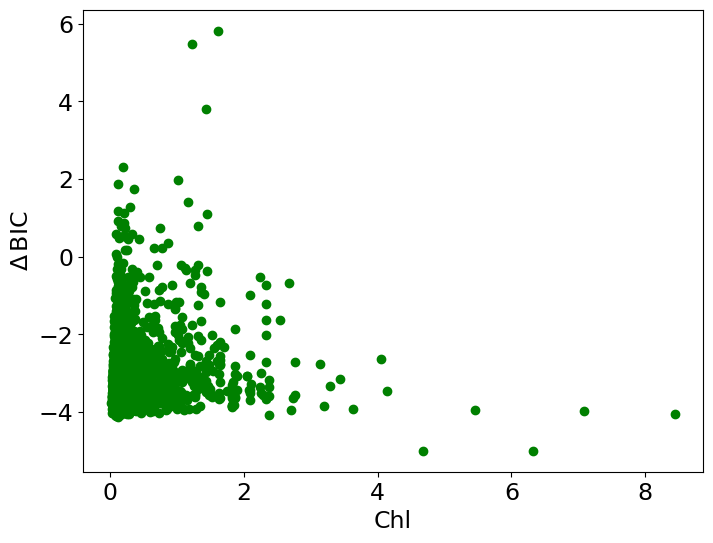

In [26]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
#
ax.plot(Chl, D_BIC, 'go')
#
#ax.legend(fontsize=15.)
oc_plotting.set_fontsize(ax, 17.)
#
ax.set_xlabel('Chl')
ax.set_ylabel(r'$\Delta \, \rm BIC$')
#
#ax.set_yscale('log')
plt.show()

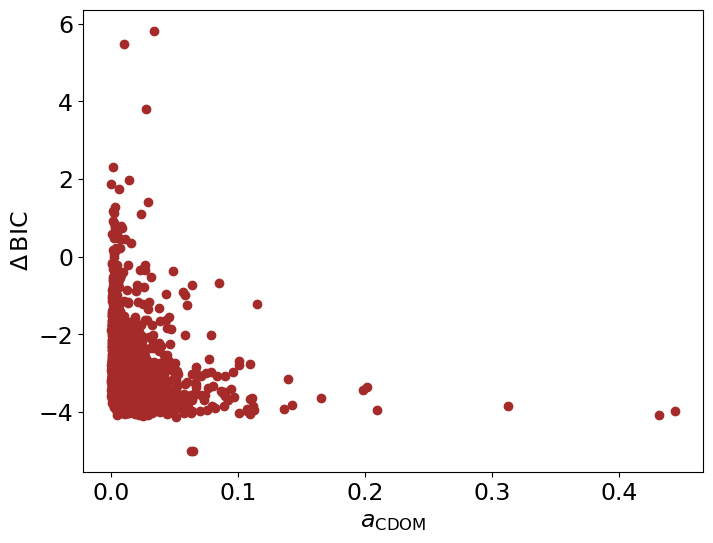

In [28]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
#
ax.plot(a_cdom, D_BIC, 'o', color='brown')
#
#ax.legend(fontsize=15.)
oc_plotting.set_fontsize(ax, 17.)
#
ax.set_xlabel(r'$a_{\rm CDOM}$')
ax.set_ylabel(r'$\Delta \, \rm BIC$')
#
#ax.set_yscale('log')
plt.show()

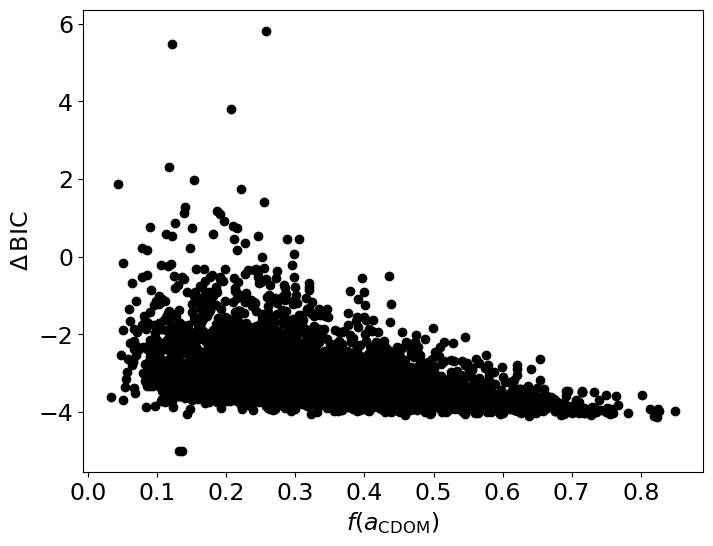

In [30]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
#
ax.plot(fa_cdom, D_BIC, 'o', color='k')
#
#ax.legend(fontsize=15.)
oc_plotting.set_fontsize(ax, 17.)
#
ax.set_xlabel(r'$f(a_{\rm CDOM})$')
ax.set_ylabel(r'$\Delta \, \rm BIC$')
#
#ax.set_yscale('log')
plt.show()